<a href="https://colab.research.google.com/github/vpbajaj/Geographic-Mapping/blob/master/Image_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install geopandas

     |████████████████████████████████| 972kB 3.4MB/s 
     |████████████████████████████████| 10.9MB 14.8MB/s 
     |████████████████████████████████| 14.7MB 256kB/s 


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

The data below is obtained from Esri ArcGIS software's 'intersect' algorithm. This algorithm retrieves the data from the part of 'Aquaduct' file that geometrically fits in the 'India' shape file.

In [40]:
# set the filepath and load
fp = '/content/drive/My Drive/Extract_Data_Jul_24__2020__6_14_17_PM/Intersect_of_Archive_and_aqueductglobalmaps21shp.shp'
#reading the file stored in variable fp
map_df = gpd.read_file(fp)
# check data type so we can see that this is not a normal dataframe, but a GEOdataframe
map_df.head()

,FID_featur,st_nm,FID_AQUEDU,GU,Shape_Leng,Shape_Area,BasinID,COUNTRY,BASIN_NAME,WITHDRAWAL,CONSUMPTIO,BA,BWS,BWS_s,BWS_cat,WSV,WSV_s,WSV_cat,SV,SV_s,SV_cat,HFO,HFO_s,HFO_cat,DRO,DRO_s,DRO_cat,BT,STOR,STOR_s,STOR_cat,GW,GW_s,GW_cat,WRI,WRI_s,WRI_cat,ECO_S,ECO_S_s,ECO_S_cat,MC,MC_s,MC_cat,ECO_V,ECO_V_s,ECO_V_cat,WCG,WCG_s,WCG_cat,DEF_PQUAL,DEF_REGREP,W_SEMICO,DEFAULT_,W_CONSTR,W_CHEM,W_POWER,W_MINE,W_OILGAS,DEF_PQUANT,W_AGR,W_FOODBV,W_TEX,OWR_cat,Shape__Are,Shape__Len,AnalysisAr,geometry
0,2,Arunanchal Pradesh,8823,8822,7.607876,1.537551,5861,Bhutan,BRAHMAPUTRA,8.376186e+08,5.045881e+08,3.696936e+10,0.022657,0.0,1. Low (<10%),0.176320,0.705281,1. Low (<0.25),1.233349,3.700048,4. High (1.0-1.33),35.0,4.236217,5. Extremely high (>27),19.823051,0.982305,1. Low (<20),3.696936e+10,-32767.000000,-32767.0,No major reservoirs,-32767.0,-32767.0,No data,0.009008,0.0,1. Low (<10%),0.172813,2.210785,3. Medium to low (20-10%),0.006934,4.793752,5. Extremely high (0.4-0.8%),0.032258,1.718229,2. Low to medium (1-5%),0.038567,1.625457,2. Low to medium (2-5%),0.736928,2.543937,1.624144,1.517437,1.245843,2.337183,1.433312,2.877462,2.860262,1.034611,1.111247,1.942715,1.387170,Low to medium risk (1-2),2.147636e+10,8.941318e+05,42.703614,"MULTIPOLYGON (((10200167.993 3230881.959, 1020..."
1,2,Arunanchal Pradesh,8824,8823,7.321278,0.935086,5861,China,BRAHMAPUTRA,8.376186e+08,5.045881e+08,3.696936e+10,0.022657,0.0,1. Low (<10%),0.176320,0.705281,1. Low (<0.25),1.233349,3.700048,4. High (1.0-1.33),35.0,4.236217,5. Extremely high (>27),19.823051,0.982305,1. Low (<20),3.696936e+10,-32767.000000,-32767.0,No major reservoirs,-32767.0,-32767.0,No data,0.009008,0.0,1. Low (<10%),0.172813,2.210785,3. Medium to low (20-10%),0.000634,1.342392,2. Low to medium (0.05-0.1%),0.032258,1.718229,2. Low to medium (1-5%),0.088958,2.831203,3. Medium to high (5-10%),0.736928,2.246832,1.262816,1.415671,1.188364,1.807256,1.349458,2.325696,2.028849,1.034611,1.244906,1.318261,1.294388,Low to medium risk (1-2),1.314646e+10,8.568907e+05,216.212873,"MULTIPOLYGON (((10227803.299 3215045.289, 1022..."
2,2,Arunanchal Pradesh,8893,8893,2.948270,0.202815,5997,Bhutan,BRAHMAPUTRA,4.136862e+09,2.456710e+09,2.824506e+11,0.014646,0.0,1. Low (<10%),0.159974,0.639895,1. Low (<0.25),1.092767,3.278300,4. High (1.0-1.33),51.0,4.578902,5. Extremely high (>27),21.625624,1.162562,2. Low to medium (20-30),2.844544e+11,0.000977,5.0,5. Extremely low (<0.12),-32767.0,-32767.0,No data,0.011740,0.0,1. Low (<10%),0.045324,4.141644,5. Extremely low (<5%),0.006934,4.793752,5. Extremely high (0.4-0.8%),0.037500,1.807355,2. Low to medium (1-5%),0.038567,1.625457,2. Low to medium (2-5%),1.380548,2.556670,2.258540,2.227073,2.061820,2.603834,1.701770,3.120435,3.086212,1.984676,1.752908,2.744150,2.057215,Medium to high risk (2-3),2.821531e+09,3.487596e+05,5.600588,"MULTIPOLYGON (((10250477.194 3157864.476, 1024..."
3,2,Arunanchal Pradesh,8894,8894,0.961785,0.005973,5997,China,BRAHMAPUTRA,4.136862e+09,2.456710e+09,2.824506e+11,0.014646,0.0,1. Low (<10%),0.159974,0.639895,1. Low (<0.25),1.092767,3.278300,4. High (1.0-1.33),51.0,4.578902,5. Extremely high (>27),21.625624,1.162562,2. Low to medium (20-30),2.844544e+11,0.000977,5.0,5. Extremely low (<0.12),-32767.0,-32767.0,No data,0.011740,0.0,1. Low (<10%),0.045324,4.141644,5. Extremely low (<5%),0.000634,1.342392,2. Low to medium (0.05-0.1%),0.037500,1.807355,2. Low to medium (1-5%),0.088958,2.831203,3. Medium to high (5-10%),1.380548,2.259564,1.931625,2.139343,2.013357,2.097459,1.623075,2.594038,2.315266,1.984676,1.869321,2.212208,1.976405,Medium to high risk (2-3),8.381987e+07,1.132507e+05,1.797461,"POLYGON ((10331474.061 3271478.779, 10331041.1..."
4,2,Arunanchal Pradesh,8944,8944,8.927879,1.003121,6128,China,BRAHMAPUTRA,3.603422e+08,1.966865e+08,3.090969e+10,0.011658,0.0,1. Low (<10%),0.176428,0.705712,1. Low (<0.25),1.130563,3.391688,4. High (1.0-1.33),38.0,4.311074,5. Extremely high (>27),20.132299,1.013230,2. Low to medium (20-30),3.090969e+10,-32767.00000

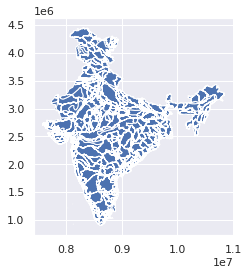

In [42]:
#map_df = map_df[map_df.COUNTRY=='India']
map_df.plot()

In [6]:
# set the filepath and load
fp2 = '/content/drive/My Drive/Igismap/Indian_States.shp'
#reading the file stored in variable fp
map_df_1 = gpd.read_file(fp2)
# check data type so we can see that this is not a normal dataframe, but a GEOdataframe
map_df_1.head()

,st_nm,geometry
0,Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2..."
1,Arunanchal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432..."
2,Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26..."
3,Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24..."
4,Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623..."


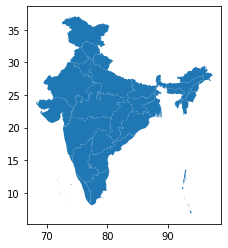

In [7]:
map_df_1.plot()

In [44]:
#opening the csv(.shp) file which contains the data to be plotted on the map
df = gpd.read_file('/content/drive/My Drive/Extract_Data_Jul_24__2020__6_14_17_PM/Intersect_of_Archive_and_aqueductglobalmaps21shp.shp')
df.head()
#selecting the columns required
df = df[['BasinID','BWS_cat']]
#renaming the column name
data_for_map = df.rename(index=str, columns={'BasinID': 'Basin_ID', 'BWS_cat': 'BWS_CATERGORY'})

In [46]:
# lets join our geodata with our datasets

# joining the geodataframe with the cleaned up csv dataframe
merged = map_df.set_index('BasinID').join(data_for_map.set_index('Basin_ID'))
#.head() returns the top 5(by default ) lines of the dataframe
merged.head()

,FID_featur,st_nm,FID_AQUEDU,GU,Shape_Leng,Shape_Area,COUNTRY,BASIN_NAME,WITHDRAWAL,CONSUMPTIO,BA,BWS,BWS_s,BWS_cat,WSV,WSV_s,WSV_cat,SV,SV_s,SV_cat,HFO,HFO_s,HFO_cat,DRO,DRO_s,DRO_cat,BT,STOR,STOR_s,STOR_cat,GW,GW_s,GW_cat,WRI,WRI_s,WRI_cat,ECO_S,ECO_S_s,ECO_S_cat,MC,MC_s,MC_cat,ECO_V,ECO_V_s,ECO_V_cat,WCG,WCG_s,WCG_cat,DEF_PQUAL,DEF_REGREP,W_SEMICO,DEFAULT_,W_CONSTR,W_CHEM,W_POWER,W_MINE,W_OILGAS,DEF_PQUANT,W_AGR,W_FOODBV,W_TEX,OWR_cat,Shape__Are,Shape__Len,AnalysisAr,geometry,BWS_CATERGORY
3624,22,Mizoram,14120,14120,6.557878,0.709031,India,None,112261824.0,43017768.0,4.195156e+10,0.002676,0.0,1. Low (<10%),0.207132,0.828529,1. Low (<0.25),1.303115,3.909344,4. High (1.0-1.33),16.0,3.523719,4. High (10-27),17.803511,0.780351,1. Low (<20),4.195156e+10,-32767.000000,-32767.0,No major reservoirs,-32767.0,-32767.0,No data,0.001651,0.0,1. Low (<10%),0.026816,4.898814,5. Extremely low (<5%),0.000718,1.521427,2. Low to medium (0.05-0.1%),0.0,1.0,1. Low (0%),0.078993,2.659798,3. Medium to high (5-10%),1.632938,2.097435,1.487615,1.428841,1.232144,1.733529,1.169388,2.163890,1.928918,0.933529,1.149146,1.557792,1.306395,Low to medium risk (1-2),9.539988e+09,7.722355e+05,7900.831980,"POLYGON ((10396389.758 2720290.433, 10397943.8...",1. Low (<10%)
3624,22,Mizoram,14120,14120,6.557878,0.709031,India,None,112261824.0,43017768.0,4.195156e+10,0.002676,0.0,1. Low (<10%),0.207132,0.828529,1. Low (<0.25),1.303115,3.909344,4. High (1.0-1.33),16.0,3.523719,4. High (10-27),17.803511,0.780351,1. Low (<20),4.195156e+10,-32767.000000,-32767.0,No major reservoirs,-32767.0,-32767.0,No data,0.001651,0.0,1. Low (<10%),0.026816,4.898814,5. Extremely low (<5%),0.000718,1.521427,2. Low to medium (0.05-0.1%),0.0,1.0,1. Low (0%),0.078993,2.659798,3. Medium to high (5-10%),1.632938,2.097435,1.487615,1.428841,1.232144,1.733529,1.169388,2.163890,1.928918,0.933529,1.149146,1.557792,1.306395,Low to medium risk (1-2),9.539988e+09,7.722355e+05,7900.831980,"POLYGON ((10396389.758 2720290.433, 10397943.8...",1. Low (<10%)
3624,22,Mizoram,14121,14121,11.177982,1.224921,Myanmar,None,112261824.0,43017768.0,4.195156e+10,0.002676,0.0,1. Low (<10%),0.207132,0.828529,1. Low (<0.25),1.303115,3.909344,4. High (1.0-1.33),16.0,3.523719,4. High (10-27),17.803511,0.780351,1. Low (<20),4.195156e+10,-32767.000000,-32767.0,No major reservoirs,-32767.0,-32767.0,No data,0.001651,0.0,1. Low (<10%),0.026816,4.898814,5. Extremely low (<5%),0.002381,3.251539,4. High (0.2-0.4%),0.0,1.0,1. Low (0%),0.169527,3.761511,4. High (10-20%),1.632938,3.221303,1.776954,1.813794,1.449573,2.401792,1.275133,2.859692,2.977369,0.933529,1.376646,2.057833,1.657364,Low to medium risk (1-2),1.637136e+10,1.309997e+06,323.296958,"MULTIPOLYGON (((10371493.727 2541174.946, 1037...",1. Low (<10%)
3624,22,Mizoram,14121,14121,11.177982,1.224921,Myanmar,None,112261824.0,43017768.0,4.195156e+10,0.002676,0.0,1. Low (<10%),0.207132,0.828529,1. Low (<0.25),1.303115,3.909344,4. High (1.0-1.33),16.0,3.523719,4. High (10-27),17.803511,0.780351,1. Low (<20),4.195156e+10,-32767.000000,-32767.0,No major reservoirs,-32767.0,-32767.0,No data,0.001651,0.0,1. Low (<10%),0.026816,4.898814,5. Extremely low (<5%),0.002381,3.251539,4. High (0.2-0.4%),0.0,1.0,1. Low (0%),0.169527,3.761511,4. High (10-20%),1.632938,3.221303,1.776954,1.813794,1.449573,2.401792,1.275133,2.859692,2.977369,0.933529,1.376646,2.057833,1.657364,Low to medium risk (1-2),1.637136e+10,1.309997e+06,323.296958,"MULTIPOLYGON (((10371493.727 2541174.946, 1037...",1. Low (<10%)
4569,31,Tripura,7900,7807,2.571923,0.073414,Bangladesh,None,307930400.0,175386576.0,6.763807e+09,0.045526,0.0,1. Low (<10%),0.246238,0.984952,1. Low (<0.25),1.158028,3.474084,4. High (1.0-1.33),33.0,4.182658,5. Extremely high (>27),16.540792,0.654079,1. Low (<20),6.763807e+09,0.046128,5.0,5. Extremely low (<0.12),-32767.0,-32767.0,No data,0.019596,0.0,1. Low (<10%),0.073525,3.443692,4. Low (10-5%),0.003440,3.782409,4. High (0.2-0.4%),0.0,1.0,1. Low (0%),0.185968,3.895057,4. High (10-20%),1.14789

In [48]:
merged.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 4848 entries, 3624 to 15000
Data columns (total 67 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   FID_featur     4848 non-null   int64   
 1   st_nm          4848 non-null   object  
 2   FID_AQUEDU     4848 non-null   int64   
 3   GU             4848 non-null   int64   
 4   Shape_Leng     4848 non-null   float64 
 5   Shape_Area     4848 non-null   float64 
 6   COUNTRY        4848 non-null   object  
 7   BASIN_NAME     3258 non-null   object  
 8   WITHDRAWAL     4848 non-null   float64 
 9   CONSUMPTIO     4848 non-null   float64 
 10  BA             4848 non-null   float64 
 11  BWS            4848 non-null   float64 
 12  BWS_s          4848 non-null   float64 
 13  BWS_cat        4848 non-null   object  
 14  WSV            4848 non-null   float64 
 15  WSV_s          4848 non-null   float64 
 16  WSV_cat        4848 non-null   object  
 17  SV             4848 n

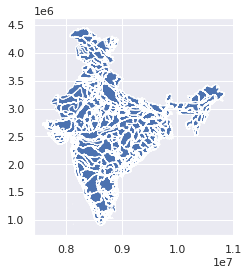

In [49]:
merged.plot()

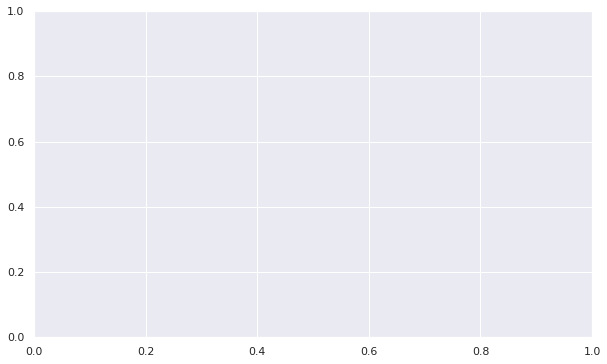

In [51]:
# set a variable that will call whatever column we want to visualise on the map
variable = 'BWS_CATERGORY'
# set the range for the choropleth
vmin, vmax = 120, 220
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))

In [52]:
merged.plot(column=variable, cmap='BuGn', legend=True, linewidth=0.8, ax=ax, edgecolor='0.8')

<Figure size 432x288 with 0 Axes>

In [53]:
# adjust legend location
leg = ax.get_legend()
leg.set_bbox_to_anchor((1.25, 0.4))
# remove the axis
ax.axis('off')
# add a title
ax.set_title('Baseline Water Stress', fontdict={'fontsize': '25', 'fontweight' : '3'})

Text(0.5, 1.0, 'Baseline Water Stress')

In [54]:
fig.savefig('map_export_india_new.png', dpi=300)

Below I repeat the process with data that I obtained from QGIS 'clip' algorithm. 

In [30]:
# set the filepath and load
fp3 = '/content/drive/My Drive/Trial /trial.shp'
#reading the file stored in variable fp
map_df_3 = gpd.read_file(fp3)
# check data type so we can see that this is not a normal dataframe, but a GEOdataframe
map_df_3.head()

,GU,Shape_Leng,Shape_Area,BasinID,COUNTRY,BASIN_NAME,WITHDRAWAL,CONSUMPTIO,BA,BWS,BWS_s,BWS_cat,WSV,WSV_s,WSV_cat,SV,SV_s,SV_cat,HFO,HFO_s,HFO_cat,DRO,DRO_s,DRO_cat,BT,STOR,STOR_s,STOR_cat,GW,GW_s,GW_cat,WRI,WRI_s,WRI_cat,ECO_S,ECO_S_s,ECO_S_cat,MC,MC_s,MC_cat,ECO_V,ECO_V_s,ECO_V_cat,WCG,WCG_s,WCG_cat,DEF_PQUAL,DEF_REGREP,W_SEMICO,DEFAULT,W_CONSTR,W_CHEM,W_POWER,W_MINE,W_OILGAS,DEF_PQUANT,W_AGR,W_FOODBV,W_TEX,OWR_cat,geometry
0,8822,7.607876,1.537551,5861,Bhutan,BRAHMAPUTRA,8.376186e+08,5.045881e+08,3.696936e+10,0.022657,0.0,1. Low (<10%),0.176320,0.705281,1. Low (<0.25),1.233349,3.700048,4. High (1.0-1.33),35.0,4.236217,5. Extremely high (>27),19.823051,0.982305,1. Low (<20),3.696936e+10,-32767.000000,-32767.0,No major reservoirs,-32767.0,-32767.0,No data,0.009008,0.0,1. Low (<10%),0.172813,2.210785,3. Medium to low (20-10%),0.006934,4.793752,5. Extremely high (0.4-0.8%),0.032258,1.718229,2. Low to medium (1-5%),0.038567,1.625457,2. Low to medium (2-5%),0.736928,2.543937,1.624144,1.517437,1.245843,2.337183,1.433312,2.877462,2.860262,1.034611,1.111247,1.942715,1.387170,Low to medium risk (1-2),"MULTIPOLYGON (((91.08348 26.80471, 91.09341 26..."
1,8823,7.321278,0.935086,5861,China,BRAHMAPUTRA,8.376186e+08,5.045881e+08,3.696936e+10,0.022657,0.0,1. Low (<10%),0.176320,0.705281,1. Low (<0.25),1.233349,3.700048,4. High (1.0-1.33),35.0,4.236217,5. Extremely high (>27),19.823051,0.982305,1. Low (<20),3.696936e+10,-32767.000000,-32767.0,No major reservoirs,-32767.0,-32767.0,No data,0.009008,0.0,1. Low (<10%),0.172813,2.210785,3. Medium to low (20-10%),0.000634,1.342392,2. Low to medium (0.05-0.1%),0.032258,1.718229,2. Low to medium (1-5%),0.088958,2.831203,3. Medium to high (5-10%),0.736928,2.246832,1.262816,1.415671,1.188364,1.807256,1.349458,2.325696,2.028849,1.034611,1.244906,1.318261,1.294388,Low to medium risk (1-2),"MULTIPOLYGON (((91.64524 27.75983, 91.64495 27..."
2,8893,2.948270,0.202815,5997,Bhutan,BRAHMAPUTRA,4.136862e+09,2.456710e+09,2.824506e+11,0.014646,0.0,1. Low (<10%),0.159974,0.639895,1. Low (<0.25),1.092767,3.278300,4. High (1.0-1.33),51.0,4.578902,5. Extremely high (>27),21.625624,1.162562,2. Low to medium (20-30),2.844544e+11,0.000977,5.0,5. Extremely low (<0.12),-32767.0,-32767.0,No data,0.011740,0.0,1. Low (<10%),0.045324,4.141644,5. Extremely low (<5%),0.006934,4.793752,5. Extremely high (0.4-0.8%),0.037500,1.807355,2. Low to medium (1-5%),0.038567,1.625457,2. Low to medium (2-5%),1.380548,2.556670,2.258540,2.227073,2.061820,2.603834,1.701770,3.120435,3.086212,1.984676,1.752908,2.744150,2.057215,Medium to high risk (2-3),"MULTIPOLYGON (((91.60438 26.80793, 91.61595 26..."
3,8894,0.961785,0.005973,5997,China,BRAHMAPUTRA,4.136862e+09,2.456710e+09,2.824506e+11,0.014646,0.0,1. Low (<10%),0.159974,0.639895,1. Low (<0.25),1.092767,3.278300,4. High (1.0-1.33),51.0,4.578902,5. Extremely high (>27),21.625624,1.162562,2. Low to medium (20-30),2.844544e+11,0.000977,5.0,5. Extremely low (<0.12),-32767.0,-32767.0,No data,0.011740,0.0,1. Low (<10%),0.045324,4.141644,5. Extremely low (<5%),0.000634,1.342392,2. Low to medium (0.05-0.1%),0.037500,1.807355,2. Low to medium (1-5%),0.088958,2.831203,3. Medium to high (5-10%),1.380548,2.259564,1.931625,2.139343,2.013357,2.097459,1.623075,2.594038,2.315266,1.984676,1.869321,2.212208,1.976405,Medium to high risk (2-3),"POLYGON ((92.78673 28.18207, 92.78810 28.18300..."
4,8944,8.927879,1.003121,6128,China,BRAHMAPUTRA,3.603422e+08,1.966865e+08,3.090969e+10,0.011658,0.0,1. Low (<10%),0.176428,0.705712,1. Low (<0.25),1.130563,3.391688,4. High (1.0-1.33),38.0,4.311074,5. Extremely high (>27),20.132299,1.013230,2. Low to medium (20-30),3.090969e+10,-32767.000000,-32767.0,No major reservoirs,-32767.0,-32767.0,No data,0.005295,0.0,1. Low (<10%),0.023238,5.000000,5. Extremely low (<5%),0.000634,1.342392,2. Low to medium (0.05-0.1%),0.038462,1.823122,2. Low to medium (1-5%),0.088958,2.831203,3. Medium to high (5-10%),1.666667,2.261817,1.617110,1.552592,1.340136,1.895456,1.333928,2.375401,2.030

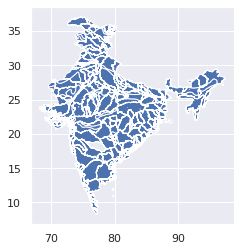

In [31]:
map_df_3.plot()

In [32]:
#opening the csv(.shp) file which contains the data to be plotted on the map
df1 = gpd.read_file('/content/drive/My Drive/Trial /trial.shp')
df.head()
#selecting the columns required
df1 = df1[['BasinID','BWS_cat']]
#renaming the column name
data_for_map_1 = df1.rename(index=str, columns={'BasinID': 'Basin_ID', 'BWS_cat': 'BWS_CATERGORY'})

In [33]:
data_for_map_1.head()

,Basin_ID,BWS_CATERGORY
0,5861,1. Low (<10%)
1,5861,1. Low (<10%)
2,5997,1. Low (<10%)
3,5997,1. Low (<10%)
4,6128,1. Low (<10%)


In [34]:
# lets join our geodata with our datasets

# joining the geodataframe with the cleaned up csv dataframe
merged_1 = map_df_3.set_index('BasinID').join(data_for_map_1.set_index('Basin_ID'))
#.head() returns the top 5(by default ) lines of the dataframe
merged_1.head()

,GU,Shape_Leng,Shape_Area,COUNTRY,BASIN_NAME,WITHDRAWAL,CONSUMPTIO,BA,BWS,BWS_s,BWS_cat,WSV,WSV_s,WSV_cat,SV,SV_s,SV_cat,HFO,HFO_s,HFO_cat,DRO,DRO_s,DRO_cat,BT,STOR,STOR_s,STOR_cat,GW,GW_s,GW_cat,WRI,WRI_s,WRI_cat,ECO_S,ECO_S_s,ECO_S_cat,MC,MC_s,MC_cat,ECO_V,ECO_V_s,ECO_V_cat,WCG,WCG_s,WCG_cat,DEF_PQUAL,DEF_REGREP,W_SEMICO,DEFAULT,W_CONSTR,W_CHEM,W_POWER,W_MINE,W_OILGAS,DEF_PQUANT,W_AGR,W_FOODBV,W_TEX,OWR_cat,geometry,BWS_CATERGORY
3624,14120,6.557878,0.709031,India,None,112261824.0,43017768.0,4.195156e+10,0.002676,0.0,1. Low (<10%),0.207132,0.828529,1. Low (<0.25),1.303115,3.909344,4. High (1.0-1.33),16.0,3.523719,4. High (10-27),17.803511,0.780351,1. Low (<20),4.195156e+10,-32767.000000,-32767.0,No major reservoirs,-32767.0,-32767.0,No data,0.001651,0.0,1. Low (<10%),0.026816,4.898814,5. Extremely low (<5%),0.000718,1.521427,2. Low to medium (0.05-0.1%),0.0,1.0,1. Low (0%),0.078993,2.659798,3. Medium to high (5-10%),1.632938,2.097435,1.487615,1.428841,1.232144,1.733529,1.169388,2.163890,1.928918,0.933529,1.149146,1.557792,1.306395,Low to medium risk (1-2),"POLYGON ((93.43137 23.66311, 93.43137 23.66310...",1. Low (<10%)
3624,14120,6.557878,0.709031,India,None,112261824.0,43017768.0,4.195156e+10,0.002676,0.0,1. Low (<10%),0.207132,0.828529,1. Low (<0.25),1.303115,3.909344,4. High (1.0-1.33),16.0,3.523719,4. High (10-27),17.803511,0.780351,1. Low (<20),4.195156e+10,-32767.000000,-32767.0,No major reservoirs,-32767.0,-32767.0,No data,0.001651,0.0,1. Low (<10%),0.026816,4.898814,5. Extremely low (<5%),0.000718,1.521427,2. Low to medium (0.05-0.1%),0.0,1.0,1. Low (0%),0.078993,2.659798,3. Medium to high (5-10%),1.632938,2.097435,1.487615,1.428841,1.232144,1.733529,1.169388,2.163890,1.928918,0.933529,1.149146,1.557792,1.306395,Low to medium risk (1-2),"POLYGON ((93.43137 23.66311, 93.43137 23.66310...",1. Low (<10%)
3624,14121,11.177982,1.224921,Myanmar,None,112261824.0,43017768.0,4.195156e+10,0.002676,0.0,1. Low (<10%),0.207132,0.828529,1. Low (<0.25),1.303115,3.909344,4. High (1.0-1.33),16.0,3.523719,4. High (10-27),17.803511,0.780351,1. Low (<20),4.195156e+10,-32767.000000,-32767.0,No major reservoirs,-32767.0,-32767.0,No data,0.001651,0.0,1. Low (<10%),0.026816,4.898814,5. Extremely low (<5%),0.002381,3.251539,4. High (0.2-0.4%),0.0,1.0,1. Low (0%),0.169527,3.761511,4. High (10-20%),1.632938,3.221303,1.776954,1.813794,1.449573,2.401792,1.275133,2.859692,2.977369,0.933529,1.376646,2.057833,1.657364,Low to medium risk (1-2),"MULTIPOLYGON (((93.40375 23.75621, 93.40517 23...",1. Low (<10%)
3624,14121,11.177982,1.224921,Myanmar,None,112261824.0,43017768.0,4.195156e+10,0.002676,0.0,1. Low (<10%),0.207132,0.828529,1. Low (<0.25),1.303115,3.909344,4. High (1.0-1.33),16.0,3.523719,4. High (10-27),17.803511,0.780351,1. Low (<20),4.195156e+10,-32767.000000,-32767.0,No major reservoirs,-32767.0,-32767.0,No data,0.001651,0.0,1. Low (<10%),0.026816,4.898814,5. Extremely low (<5%),0.002381,3.251539,4. High (0.2-0.4%),0.0,1.0,1. Low (0%),0.169527,3.761511,4. High (10-20%),1.632938,3.221303,1.776954,1.813794,1.449573,2.401792,1.275133,2.859692,2.977369,0.933529,1.376646,2.057833,1.657364,Low to medium risk (1-2),"MULTIPOLYGON (((93.40375 23.75621, 93.40517 23...",1. Low (<10%)
4569,7807,2.571923,0.073414,Bangladesh,None,307930400.0,175386576.0,6.763807e+09,0.045526,0.0,1. Low (<10%),0.246238,0.984952,1. Low (<0.25),1.158028,3.474084,4. High (1.0-1.33),33.0,4.182658,5. Extremely high (>27),16.540792,0.654079,1. Low (<20),6.763807e+09,0.046128,5.0,5. Extremely low (<0.12),-32767.0,-32767.0,No data,0.019596,0.0,1. Low (<10%),0.073525,3.443692,4. Low (10-5%),0.003440,3.782409,4. High (0.2-0.4%),0.0,1.0,1. Low (0%),0.185968,3.895057,4. High (10-20%),1.147897,3.449292,2.079067,2.422247,2.131852,2.670355,1.513997,3.281757,3.411456,1.931001,1.954313,2.639725,2.236996,Medium to high risk (2-3),"MULTIPOLYGON (((91.94899 23.47163, 91.94676 23...",1. Low (<10%)


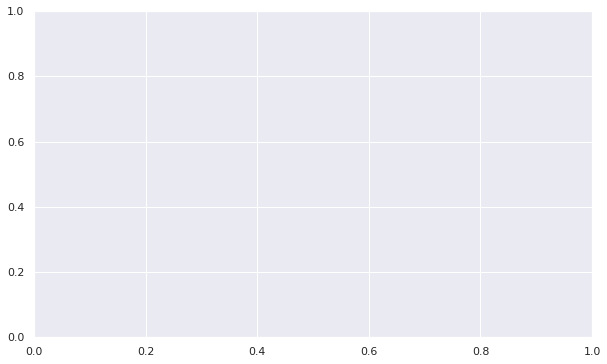

In [35]:
# set a variable that will call whatever column we want to visualise on the map
variable = 'BWS_CATERGORY'
# set the range for the choropleth
vmin, vmax = 120, 220
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))

In [36]:
merged_1.plot(column=variable, cmap='BuGn', legend=True, linewidth=0.8, ax=ax, edgecolor='0.8')

<Figure size 432x288 with 0 Axes>

In [37]:
# adjust legend location
leg = ax.get_legend()
leg.set_bbox_to_anchor((1.25, 0.4))
# remove the axis
ax.axis('off')
# add a title
ax.set_title('Baseline Water Stress', fontdict={'fontsize': '25', 'fontweight' : '3'})

Text(0.5, 1.0, 'Baseline Water Stress')

In [38]:
fig.savefig('map_export_india_new_1.png', dpi=300)